# 9.3 ANOVA

## Introduction to ANOVA

ANOVA stands for ANalysis Of VAriance. An ANOVA test is a hypothesis test used to compare the means among several populations. The test uses variances to help determine if the population means are equal or not. To perform a one-way ANOVA test, the following basic assumptions must be fulfilled:

- Each population is normally distributed.
- All samples are randomly selected and independent.
- The populations have equal variances (or standard deviations).

The null hypothesis is that all the population means are the same. The alternative hypothesis is that at least one pair of means is different. For example, if there are k populations:

$$
\begin{align*}
&H_0:\mu_1 = \mu_2 = \mu_3 = \cdots = \mu_k \\
&H_a: \text{At least one mean isn't equal to all the other means}
\end{align*}
$$

ANOVA works by comparing the approximate variance *between* the samples (that is, how much the samples vary with each other) with the approximate variance *within* the samples (that is, how much on average each sample varies on its own). If the null hypothesis is true so that the population means are all equal, then the variance between the samples and the variance within the samples should be about equal.

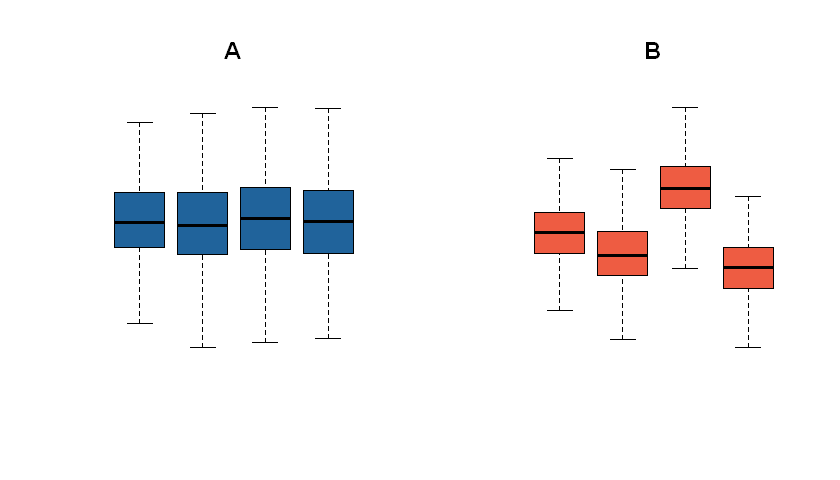

In [39]:
#**ALT=Two groups of box plots. Group A has little variation between box plots; group B has significant variation between box plots.**#
#**HIDE_INPUT**#
library(repr)
options(repr.plot.width = 7, repr.plot.height=4)
par(mfrow = c(1, 2))

n <- 500

A <- rnorm(n, 0, 5)
B <- rnorm(n, 0, 5)
C <- rnorm(n, 0, 5)
D <- rnorm(n, 0, 5)
boxplot(A, B, C, D, col="#20639b", axes=FALSE, outline=FALSE, main= "A")

A <- rnorm(n, 4, 5)
B <- rnorm(n, 0, 5)
C <- rnorm(n, 11, 5)
D <- rnorm(n, -2, 5)
boxplot(A, B, C, D, col = "tomato2", axes = FALSE, outline=FALSE, main = "B")

To better understand the principles behind ANOVA, consider the two groups of box plots above. In group A (the blue box plots), notice that there is little variation between the box plots of the different samples. It is reasonable to think that the underlying population means may be equal. 

In comparison, there is considerable variation in group B (the orange box plots). In fact, there is so much variation between these samples that it is very unlikely that the underlying population means between these samples are all equal.

## Notation
An ANOVA test can involve several populations and samples. To make our meaning clear, we will use the following notation in this section.

- $x_j$ are the data values in the $j$th sample.
- $n_j$ is the number of data values in the $j$th sample.
- $\bar{x}_j$ is the mean of the $j$th sample. As usual, the sample mean $\bar{x}_j$ is the sum of all data values in the sample divided by the number of data values in the sample:
$$\bar{x}_j = \dfrac{\sum x_j}{n_j}.$$
- $\bar{\bar{x}}$ is the **grand mean**. It is the mean of the combined data values of all the samples. It is calculated by adding all data values from all samples together, then dividing by the total number of all the data values from all samples:
$$\bar{\bar{x}} = \frac{\sum x_1 + \sum x_2 + \cdots + \sum x_k}{n_1 + n_2 + \cdots + n_k},$$
where $k$ in the equation represents the number of samples, with one sample taken from each population.

An simple example may help to clarify the notation.

***

### Example 3.1
Three small samples were drawn from three populations. The sample data obtained is:

    Sample 1:  18, 21, 20, 20, 17
    Sample 2:  22, 19, 18, 21, 19, 16, 18
    Sample 3:  20, 19, 17, 21
    
The data values $x_1$ in sample 1 are 18, 21, 20, 20, 17. There are 5 data values in sample 1, so $n_1 = 5$. We can use R to calculate the mean $\bar{x}_1$ of sample 1.

In [2]:
x1 <- c(18, 21, 20, 20, 17)
n1 <- length(x1)

xbar1 <- sum(x1)/n1
xbar1

[1] 19.2

The mean of sample 1 is $\bar{x}_1 = 19.2$.

The data values $x_2$ in sample 2 are 22, 19, 18, 21, 19, 16, 18. There are 7 data values in sample 2, so $n_2 = 7$. We can use R to calculate the mean $\bar{x}_2$ of sample 2.

In [3]:
x2 <- c(22, 19, 18, 21, 19, 16, 18)
n2 <- length(x2)

xbar2 <- sum(x2)/n2
xbar2

[1] 19

The mean of sample 2 is $\bar{x}_2 = 19$.

The data values $x_3$ in sample 3 are 20, 19, 17, 21. There are 4 data values in sample 3, so $n_3 = 5$. We can use R to calculate the mean $\bar{x}_3$ of sample 3.

In [4]:
x3 <- c(20, 19, 17, 21)
n3 <- length(x3)

xbar3 <- sum(x3)/n3
xbar3

[1] 19.25

The mean of sample 3 is $\bar{x}_3 = 19.25$.

Now we can use R to calculate the grand mean $\bar{\bar{x}}$ of these three samples.

In [5]:
grandx <- (sum(x1) + sum(x2) + sum(x3))/(n1 + n2 + n3)
grandx

[1] 19.125

The grand mean&mdash;the mean of all the data in all three samples&mdash;is $\bar{\bar{x}} = 19.125$.

***

## The Test Statistic For an ANOVA Test
To calculate the test statistic for an ANOVA test with $k$ samples (one sample from each population), two estimates of the variance are made: 

<br/>

- $MS_{\text{between}}$ is the **m**ean **s**quare estimate of the variance **between** the sample means of the different samples. We calculate $MS_{\text{between}}$ using the formula
<br/>
<br/>
$$ MS_{\text{between}} = \frac{SS_{\text{between}}}{df_{\text{between}}}, $$
<br/>
where $SS_{\text{between}}$, which measures the sum-of-squares variation between the sample means and the grand mean, and the degrees of freedom $df_{\text{between}}$ are given by
<br/>
<br/>
$$\begin{align*}
SS_{\text{between}} &= n_1(\bar{x}_1 - \bar{\bar{x}})^2 + n_2(\bar{x}_2 - \bar{\bar{x}})^2 + \cdots + n_k(\bar{x}_k - \bar{\bar{x}})^2, \\
df_{\text{between}} &= k - 1.
\end{align*}$$

<br/> 
<br/>

- $MS_{\text{within}}$ is the **m**ean **s**quare estimate of the average of the sample variances **within** the samples. We calculate $MS_{\text{within}}$ using the formula
<br/>
<br/>
$$ MS_{\text{within}} = \frac{SS_{\text{within}}}{df_{\text{within}}}, $$
<br/>
where $SS_{\text{within}}$, which measures the sum-of-squares variation within each sample, and the degrees of freedom $df_{\text{within}}$ are given by
<br/>
<br/>
$$\begin{align*}
SS_{\text{within}} &= \sum (x_1 - \bar{x}_1)^2 + \sum (x_2 - \bar{x}_2)^2 + \cdots + \sum (x_k - \bar{x}_k)^2, \\
df_{\text{within}} &= (n_1 - 1) + (n_2 - 1) + \cdots + (n_k - 1).
\end{align*}$$

<br/> 
<br/>

$MS_{\text{between}}$ and $MS_{\text{within}}$ both estimate variances, so we use an $F$-distribution to perform an ANOVA test just like we do when we compared two population variances. **The $F$-statistic we use for an ANOVA test is given by**
<br/>
<br/>
$$ F = \frac{MS_{\text{between}}}{MS_{\text{within}}}, $$
<br/>
where **the numerator degrees of freedom is** $df_{\text{between}}$ and **the denominator degrees of freedom is** $df_{\text{within}}$.

If the null hypothesis is true (that is, if all the population means are equal), then we would expect the variance between samples (estimated by $MS_{\text{between}}$) to equal the average variance within a sample (estimated by $MS_{\text{within}}$), in which case the test statistic $F = 1$. But if the null hypothesis is not true, then we would expect the variance between samples to be greater than the average variance within a sample, in which case the test statistic $F > 1$. **Because of this, an ANOVA test is always right-tailed.**

The general steps for completing a hypothesis test have not changed:
1. State the null and alternative hypotheses.
2. Assuming the null hypothesis is true, determine the features of the distribution of test statistics.
3. Find the $p$-value of the test statistic.
4. Make a conclusion about the null hypothesis.